In [1]:
# import h5py
import numpy as np
import pandas as pd
#import gdal
import matplotlib
import matplotlib.pyplot as plt
import IPython.display 
from PIL import Image

%matplotlib inline 

In [2]:
import spectral.io.envi as envi

In [3]:
img = envi.open('Data/Ex1.hdr', 'Data/Ex1.img')

In [4]:
img

	Data Source:   './Data/Ex1.img'
	# Rows:           4060
	# Samples:         275
	# Bands:           285
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32

There are 285 slices of 4060 x 275 images. Each slice corresponds to a wavelength.

In [5]:
pixel_x = range(0,img.shape[0])[0]
pixel_y = range(0,img.shape[1])[0]

In [6]:
wavelength = img.bands.centers
reflectance = img.read_pixel(pixel_x,pixel_y)

In [7]:
good_wavelengths_mask = [x for x in range(0,len(wavelength)) if wavelength[x] > 1000 and wavelength[x] < 2400]

In [8]:
wavelength = [wavelength[x] for x in good_wavelengths_mask]
reflectance = [reflectance[x] for x in good_wavelengths_mask]

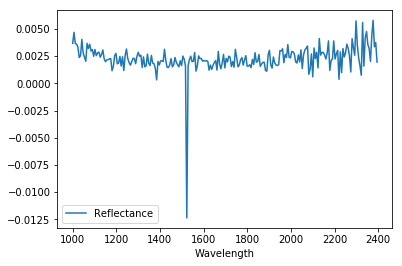

In [14]:
df_plot = pd.DataFrame(wavelength,reflectance).reset_index()
df_plot.columns = ['Reflectance','Wavelength']
df_plot.set_index('Wavelength',inplace=True)
df_plot.plot()

## Pick 20 random samples: 4 from each image

Pixel (633,160) from Data/Ex1.img


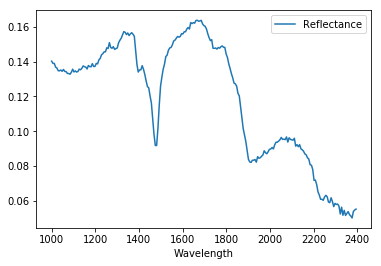

Pixel (377,114) from Data/Ex1.img


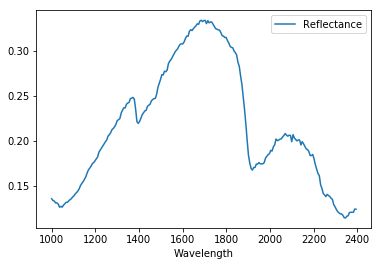

Pixel (3083,98) from Data/Ex1.img


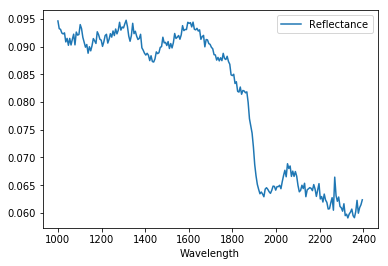

Pixel (2235,211) from Data/Ex1.img


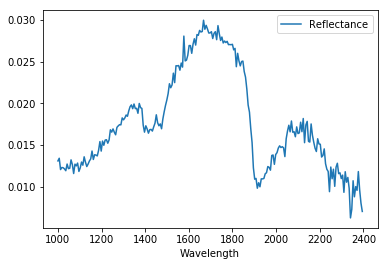

Pixel (449,129) from Data/Ex1.img


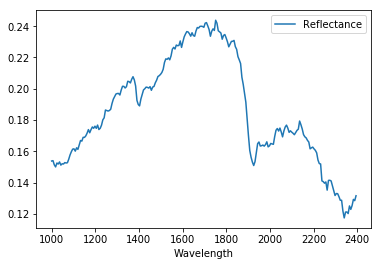

Pixel (591,300) from Data/Ex2.img


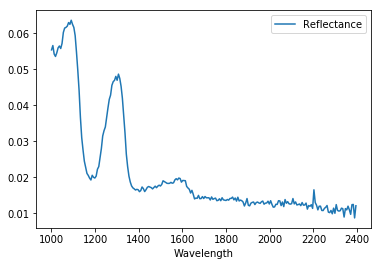

Pixel (1954,178) from Data/Ex2.img


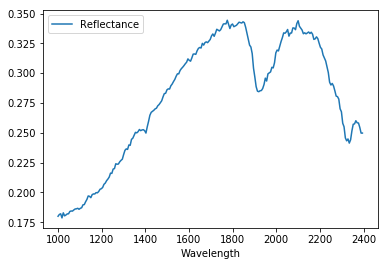

Pixel (3446,99) from Data/Ex2.img


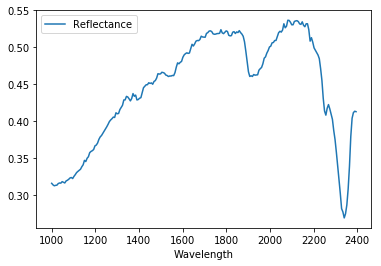

Pixel (781,80) from Data/Ex2.img


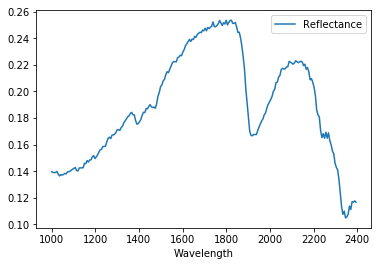

Pixel (1769,33) from Data/Ex2.img


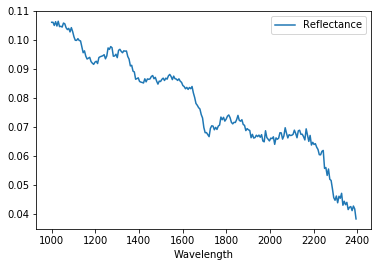

Pixel (1612,143) from Data/Ex3.img


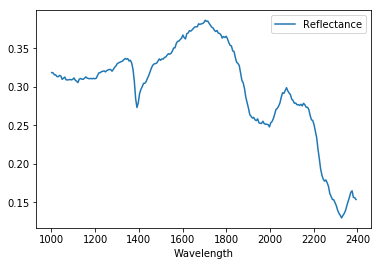

Pixel (1301,181) from Data/Ex3.img


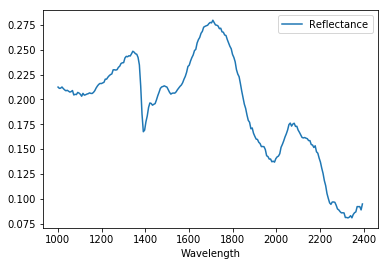

Pixel (1497,100) from Data/Ex3.img


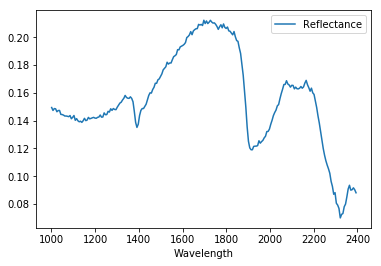

Pixel (2093,154) from Data/Ex3.img


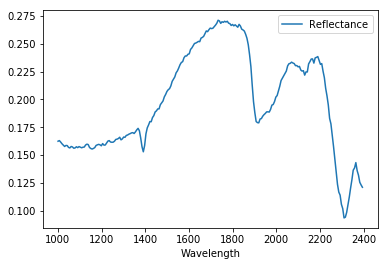

Pixel (2681,135) from Data/Ex3.img


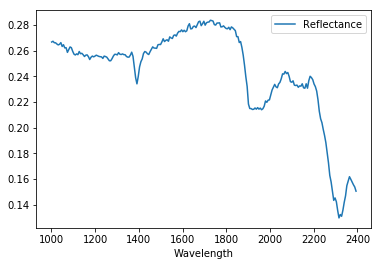

Pixel (1064,282) from Data/Ex4.img


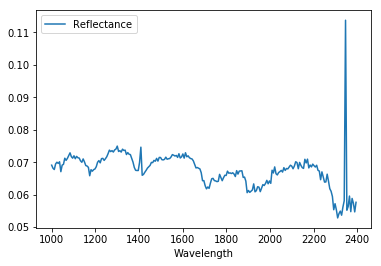

Pixel (2510,180) from Data/Ex4.img


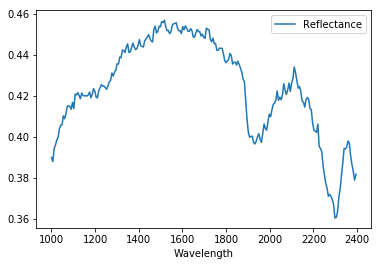

Pixel (224,310) from Data/Ex4.img


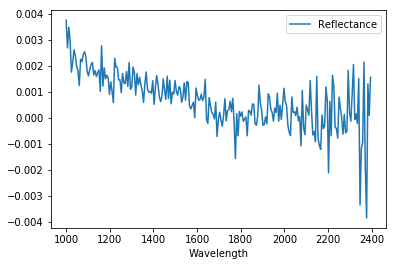

Pixel (1719,222) from Data/Ex4.img


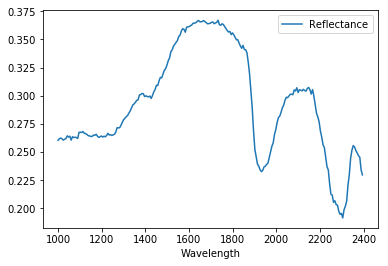

Pixel (3081,235) from Data/Ex4.img


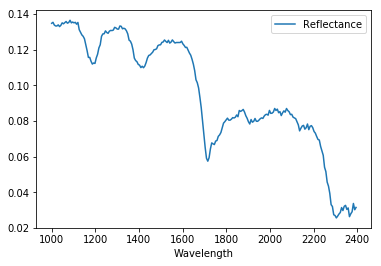

Pixel (1724,68) from Data/Ex5.img


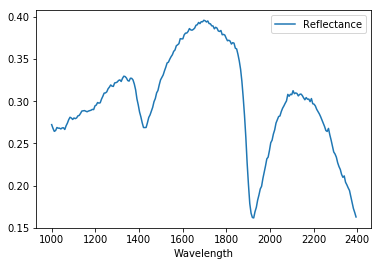

Pixel (2823,150) from Data/Ex5.img


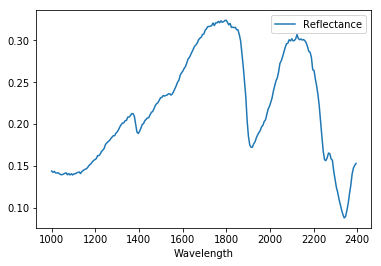

Pixel (1614,200) from Data/Ex5.img


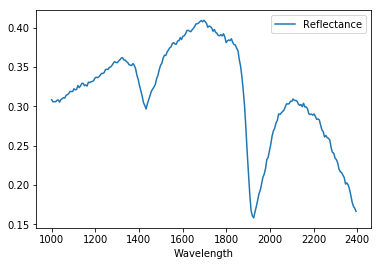

Pixel (3490,308) from Data/Ex5.img


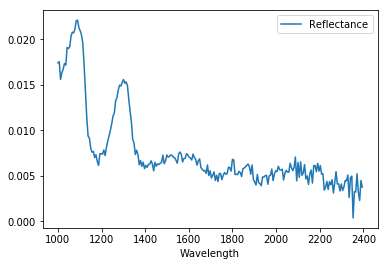

Pixel (2177,173) from Data/Ex5.img


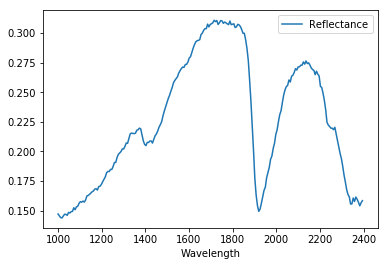

In [53]:
for img_number in range(1,6):
    img = envi.open('Data/Ex' + str(img_number) + '.hdr', 'Data/Ex' + str(img_number) + '.img')

    for counter in range(0,5):
        random_pixel_x = np.random.randint(0,img.shape[0])
        random_pixel_y = np.random.randint(0,img.shape[1])

        wavelength = img.bands.centers
        reflectance = img.read_pixel(random_pixel_x,random_pixel_y)

        good_wavelengths_mask = [x for x in range(0,len(wavelength)) if wavelength[x] > 1000 and wavelength[x] < 2400]

        wavelength = [wavelength[x] for x in good_wavelengths_mask]
        reflectance = [reflectance[x] for x in good_wavelengths_mask]

        print("Pixel (" + str(random_pixel_x) + "," + str(random_pixel_y) + ") from " + 'Data/Ex' + str(img_number) + '.img')
        df_plot = pd.DataFrame(wavelength,reflectance).reset_index()
        df_plot.columns = ['Reflectance','Wavelength']
        df_plot.set_index('Wavelength',inplace=True)
        df_plot.plot()
        plt.show()

## Anomaly detection idea: spectrum crossing its moving average

In [50]:
df_plot['rolling'] = df_plot['Reflectance'].rolling(30).mean()

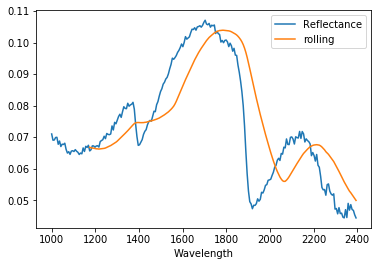

In [51]:
df_plot.plot()

## Get pure mineral spectra

In [56]:
img = envi.open('Data/usgs_min.hdr', 'Data/usgs_min.sli')

In [77]:
spectra = pd.DataFrame(img.spectra, index=img.names, columns=[x*1000 for x in img.bands.centers]).T

In [80]:
spectra.shape

(420, 481)